In [1]:
from daugman_iris_edge_detection import DIED

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def image_5x4_graph(images, cmap='gray'):
    plt.figure(figsize=(15, 15))
    for i in range(20):
        ax = plt.subplot(5, 4, i + 1)
        plt.imshow(images[i], cmap=cmap)
        plt.axis("off")


def load_images_from_folder(folder):
    images = []
    
    for root, dirs, files in os.walk(folder, topdown=False):
        if len(files) != 0:
            while True:
                random = np.random.randint(3)
                image_loc = files[random]
                image = cv2.imread(os.path.join(root, image_loc))
                try:
                    if image.shape == (150, 200, 3): 
                        break
                except:
                    pass
                    
            shape = image.shape
            images.append(image)

    return np.array(images)

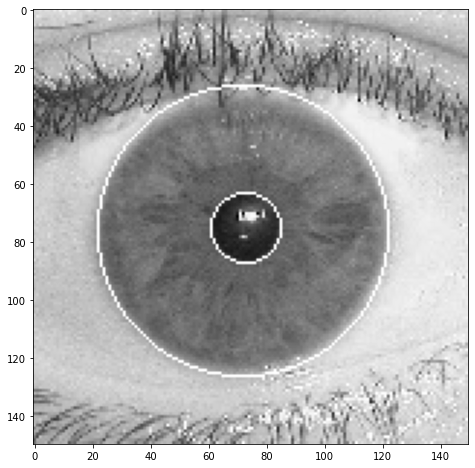

In [3]:
root = 'test_images/'

eye_img1 = cv2.imread(root + 'eye_img.jpg', 0)

test1 = DIED(eye_img1)

values1 = test1.result()[0]

plt.figure(figsize=(8, 8))

plt.imshow(values1, cmap='gray')

In [4]:
%%timeit

DIED(eye_img1).result()

569 ms ± 1.64 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


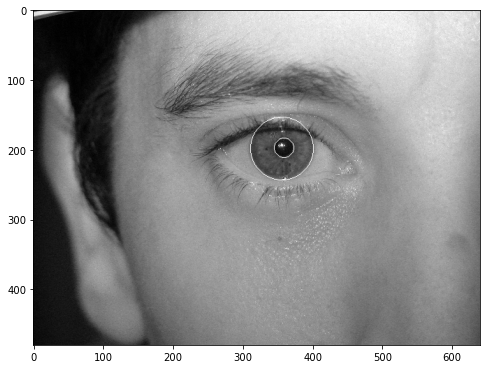

In [5]:
eye_img2 = cv2.imread(root + 'eye_img2.jpg', 0)

test2 = DIED(eye_img2)

values2 = test2.result()[0]

plt.figure(figsize=(8, 10))

plt.imshow(values2, cmap='gray')

In [6]:
images = load_images_from_folder(root + 'UBIRIS_200_150_R/Sessao_1/')

In [7]:
image_lib = []
info_lib = []

for i in range(images.shape[0]):
    image = images[i]
    img, info = DIED(image, c_type='full').result()
    image_lib.append(img)
    info_lib.append(info)
    
image_lib = np.array(image_lib)
info_lib = np.array(info_lib)

First 20 eye images.


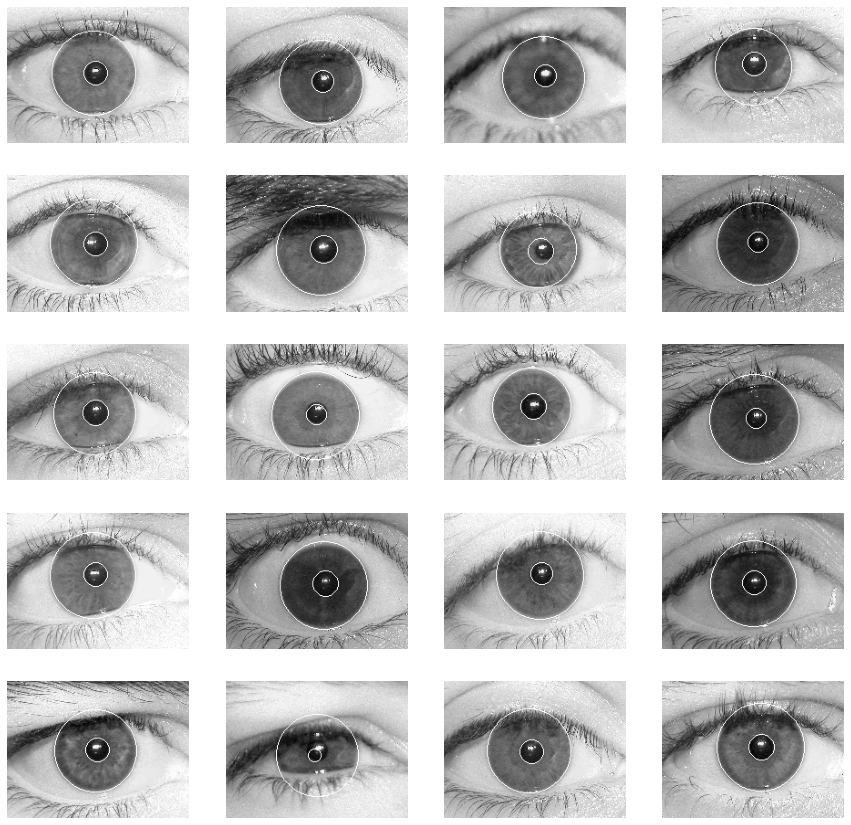

In [8]:
print('First 20 eye images.')

image_5x4_graph(image_lib[0:21], cmap='gray')

Worst 20 eye images(According to their diff. value).


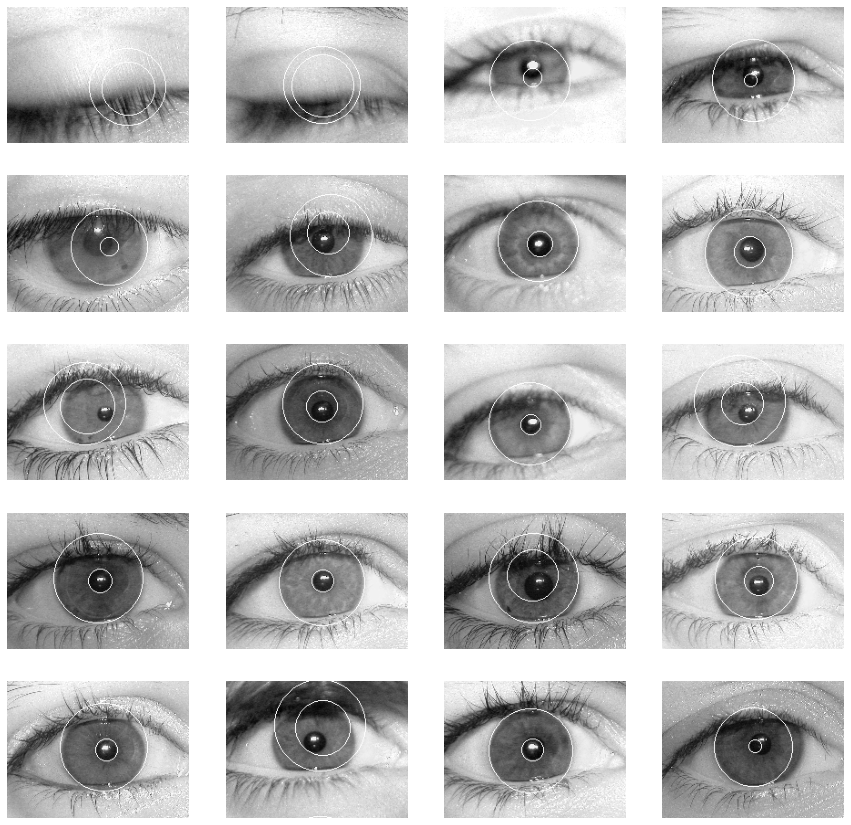

In [9]:
print('Worst 20 eye images(According to their diff. value).')

image_5x4_graph(image_lib[info_lib[:,2].argsort()[0:21]], cmap='gray')

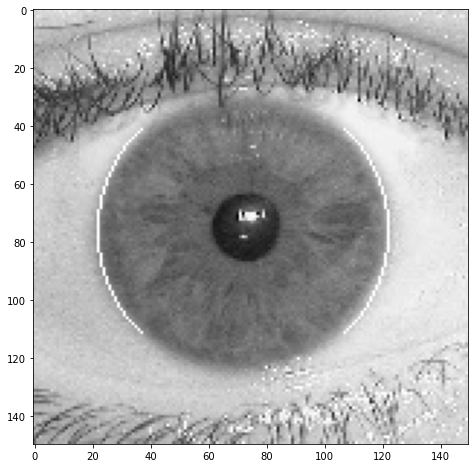

In [10]:
from circle_perimeter import circle_perimeter

eye = cv2.imread(root + 'eye_img.jpg', 0)

circle = circle_perimeter(76, 72, 50)

eye[circle] = 255

plt.figure(figsize=(8, 8))

plt.imshow(eye, cmap='gray')

In [11]:
image_lib = []
info_lib = []

for i in range(images.shape[0]):
    image = images[i]
    img, info = DIED(image, c_type='half').result()
    image_lib.append(img)
    info_lib.append(info)
    
image_lib = np.array(image_lib)
info_lib = np.array(info_lib)

First 20 eye images.


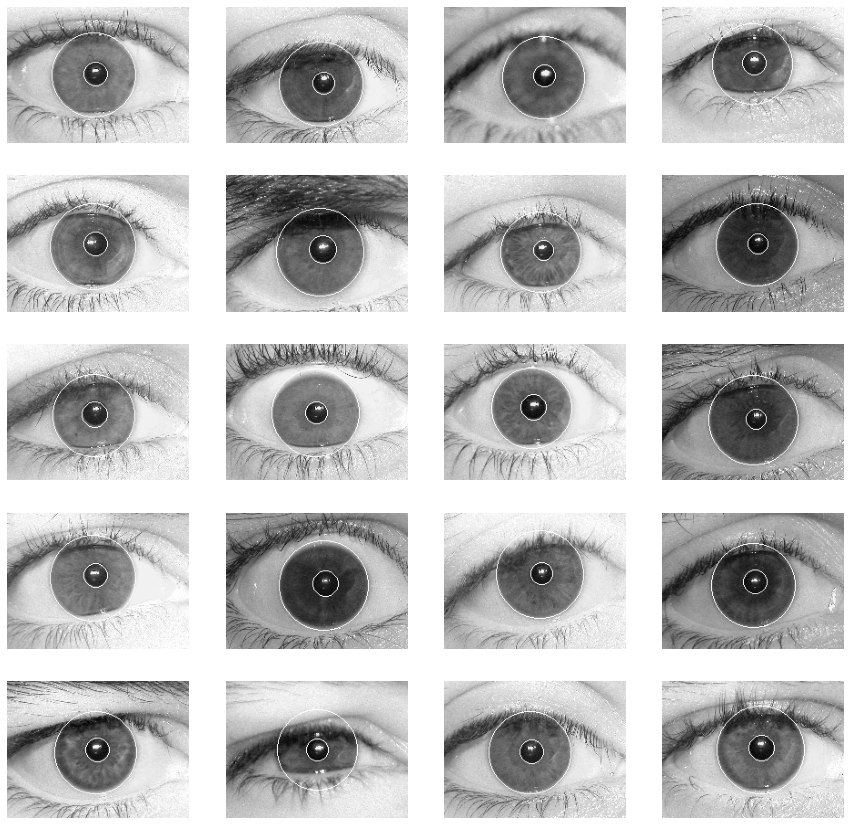

In [12]:
print('First 20 eye images.')

image_5x4_graph(image_lib[0:21], cmap='gray')

Worst 20 eye images(According to their diff. value).


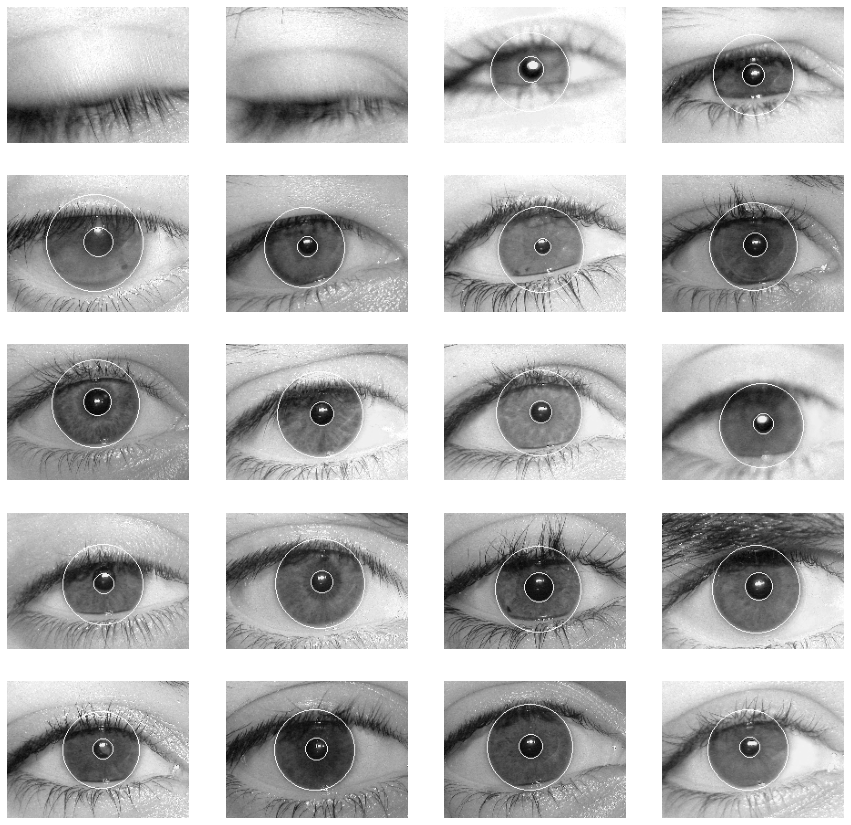

In [13]:
print('Worst 20 eye images(According to their diff. value).')

image_5x4_graph(image_lib[info_lib[:,2].argsort()[0:21]], cmap='gray')